### Проверить работу YOLOv7 

In [16]:
# Clone source code YOLOv7 
%cd /content/drive/MyDrive/mipt/Nir/yolov7_train
!git clone https://github.com/WongKinYiu/yolov7

/content/drive/MyDrive/mipt/Nir/yolov7_train
fatal: destination path 'yolov7' already exists and is not an empty directory.


In [17]:
%cd /content/drive/MyDrive/mipt/Nir/yolov7_train/yolov7
!python detect.py --weights pretrain/yolov7.pt --source test_images/15271255494_fcc90d3f9b_k.jpg

/content/drive/MyDrive/mipt/Nir/yolov7_train/yolov7
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='test_images/15271255494_fcc90d3f9b_k.jpg', update=False, view_img=False, weights=['pretrain/yolov7.pt'])
YOLOR 🚀 v0.1-116-g8c0bf3f torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.875MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Model Summary: 306 layers, 36905341 parameters, 6652669 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

Traceback (most recent call last):
  File "detect.py", line 196, in <module>
    detect()
  File "detect.py", line 57, in detect
    dataset = LoadImages(source, img_size=imgsz, stride=stride)
  File "/content/drive/MyDrive/mipt/Nir/yolov7_train/yolov7/utils/datasets.py", line 13

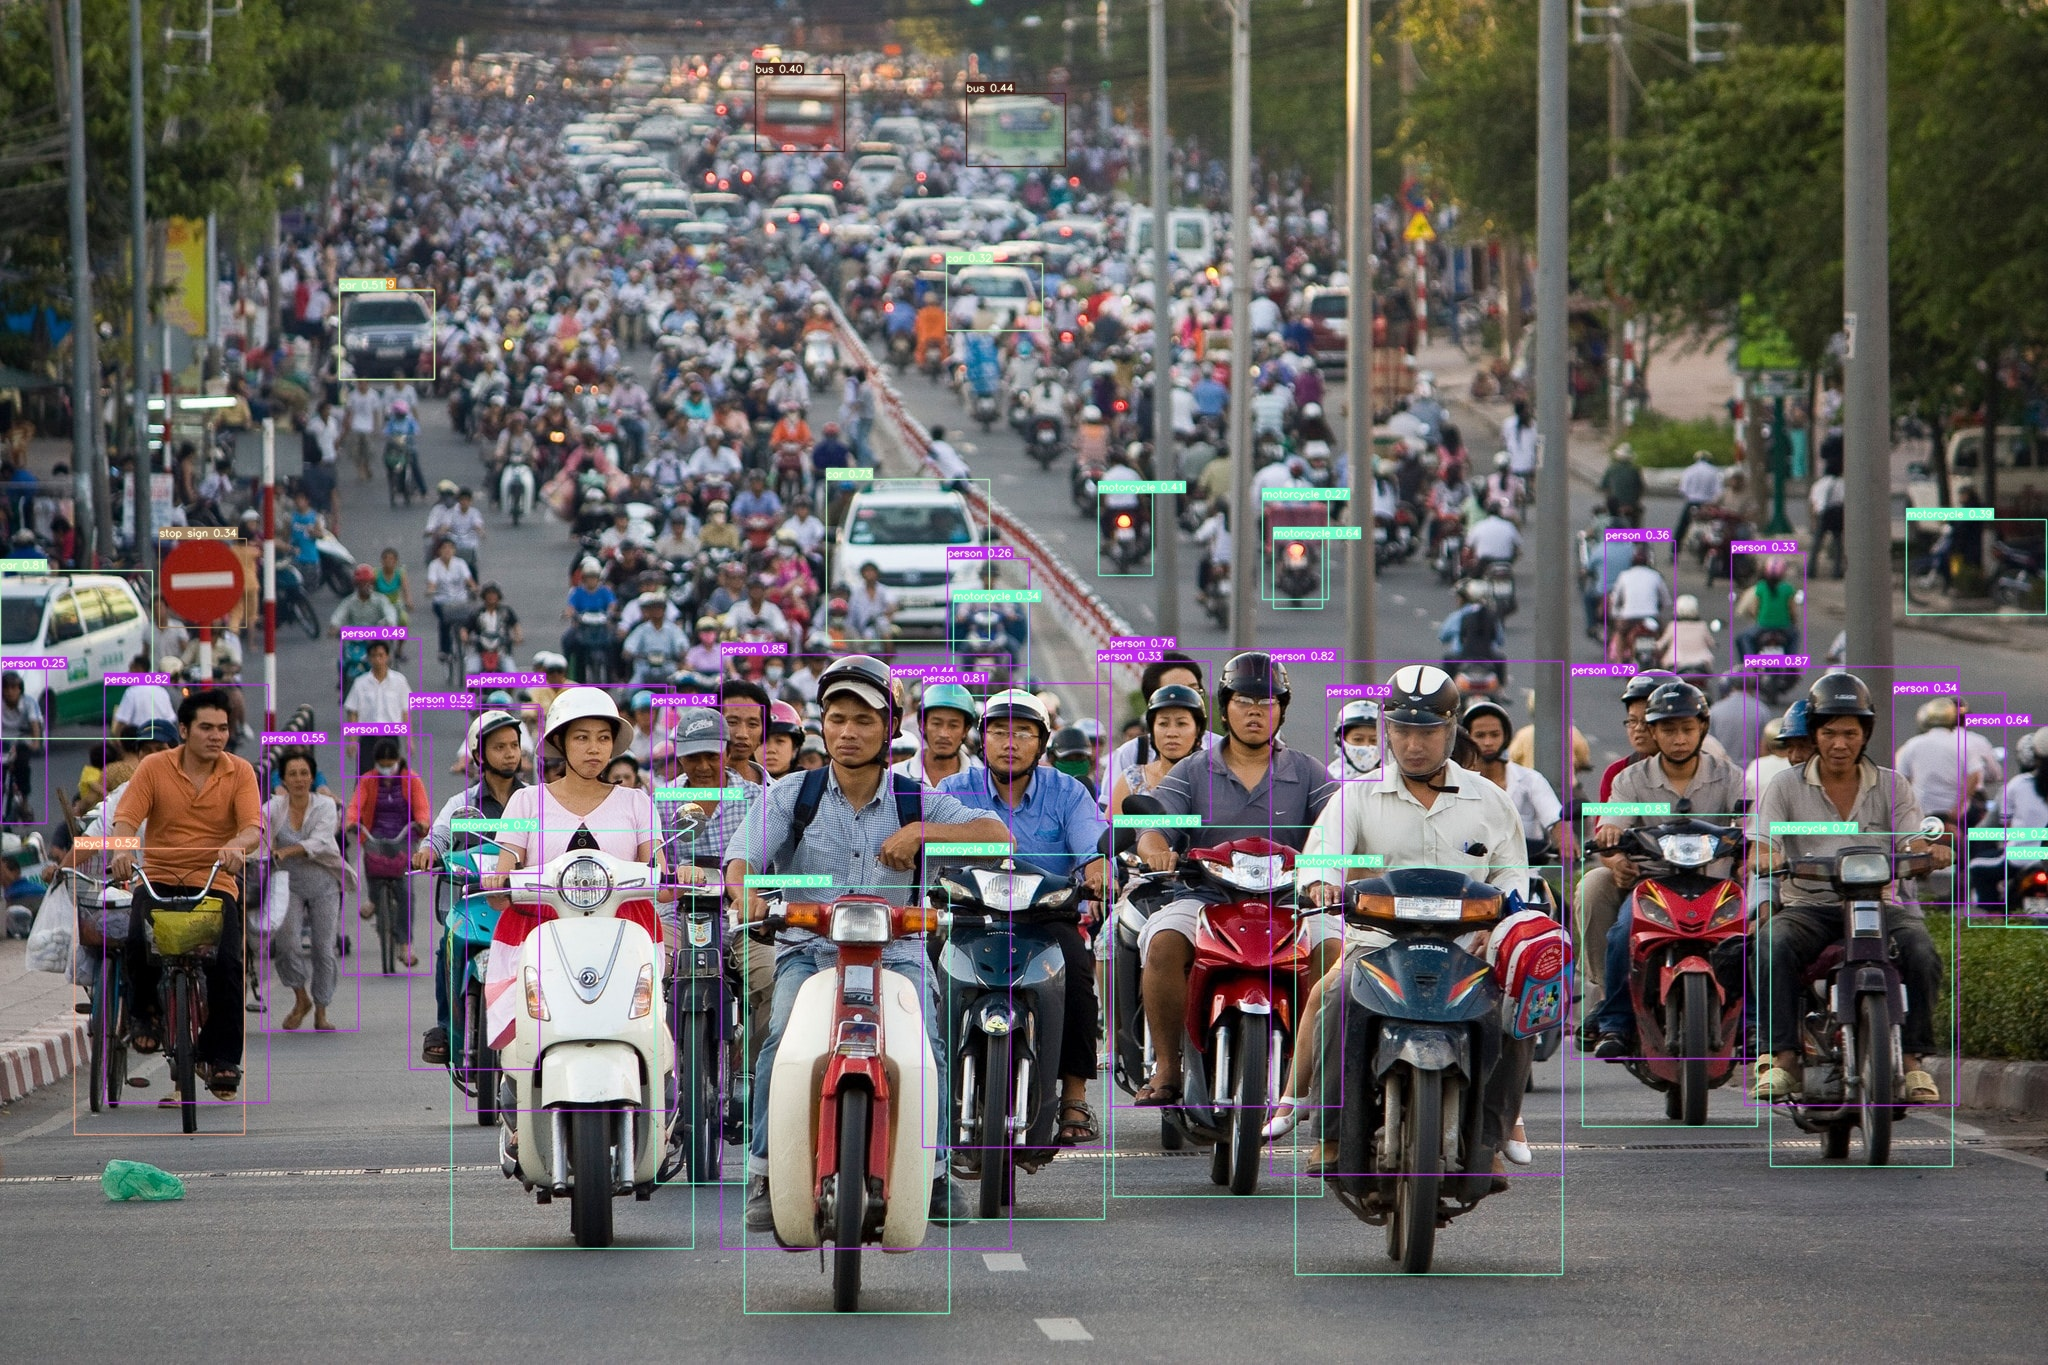

In [19]:
from IPython.display import Image, display
display(Image(filename="//content/drive/MyDrive/mipt/Nir/yolov7_train/yolov7/runs/detect/exp/15271255494_fcc90d3f9b_k.jpg"))

Вроде он рвботает нормально

### Train yolov7 

Реорганизовать каталог для выполнения программы обучения train_data for yolov7
1. train
 - images -- file .jpg
 - labels -- file .txt
2. test
 - images -- file .jpg
 - labels -- file.txt

объявить файл yaml. Исходный датасет имеет только один класс

In [ ]:
%cd /content/drive/MyDrive/mipt/Nir/yolov7_train/yolov7
!rm data/mydataset.yaml 
!echo 'train: ../train_data/train' >> data/mydataset.yaml
!echo 'val: ../train_data/train' >> data/mydataset.yaml
!echo 'nc: 1' >> data/mydataset.yaml
!echo "names: ['car']" >> data/mydataset.yaml

/content/drive/MyDrive/mipt/Нир/yolov7_train/yolov7


Train model YOLOv7. Сделал более 40 epochs. Но размер датасета - 102 изображений то есть некоторая проблема. До эпоха 24 - работает нормально. mAP > 0.5

In [30]:
%cd /content/drive/MyDrive/mipt/Nir/yolov7_train/yolov7
!python train.py --batch 8 --cfg cfg/training/yolov7.yaml --epochs 24 --data data/mydataset.yaml --weights '/content/drive/MyDrive/mipt/Nir/yolov7_train/yolov7/runs/train/exp13/weights/best.pt'

      9/23     7.35G   0.05905   0.01147         0   0.07052       100       640: 100% 13/13 [00:20<00:00,  1.59s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100% 7/7 [00:05<00:00,  1.37it/s]
                 all         102         349       0.443         0.5       0.356         0.1

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
     10/23     7.35G   0.05044   0.01228         0   0.06272        61       640: 100% 13/13 [00:20<00:00,  1.60s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100% 7/7 [00:04<00:00,  1.57it/s]
                 all         102         349       0.444       0.556       0.369       0.118

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
     11/23     7.35G   0.05033   0.01227         0   0.06259        42       640: 100% 13/13 [00:22<00:00,  1.74s/it]
               Class      Images      La

Тест на изображение в  test после эпоха 24.

In [31]:
%cd /content/drive/MyDrive/mipt/Nir/yolov7_train/yolov7/
!python detect.py --weights /content/drive/MyDrive/mipt/Nir/yolov7_train/yolov7/runs/train/exp17/weights/last.pt --source test_images/test.jpg

/content/drive/MyDrive/mipt/Nir/yolov7_train/yolov7
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='test_images/test.jpg', update=False, view_img=False, weights=['/content/drive/MyDrive/mipt/Nir/yolov7_train/yolov7/runs/train/exp17/weights/last.pt'])
YOLOR 🚀 v0.1-116-g8c0bf3f torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.875MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/Tens

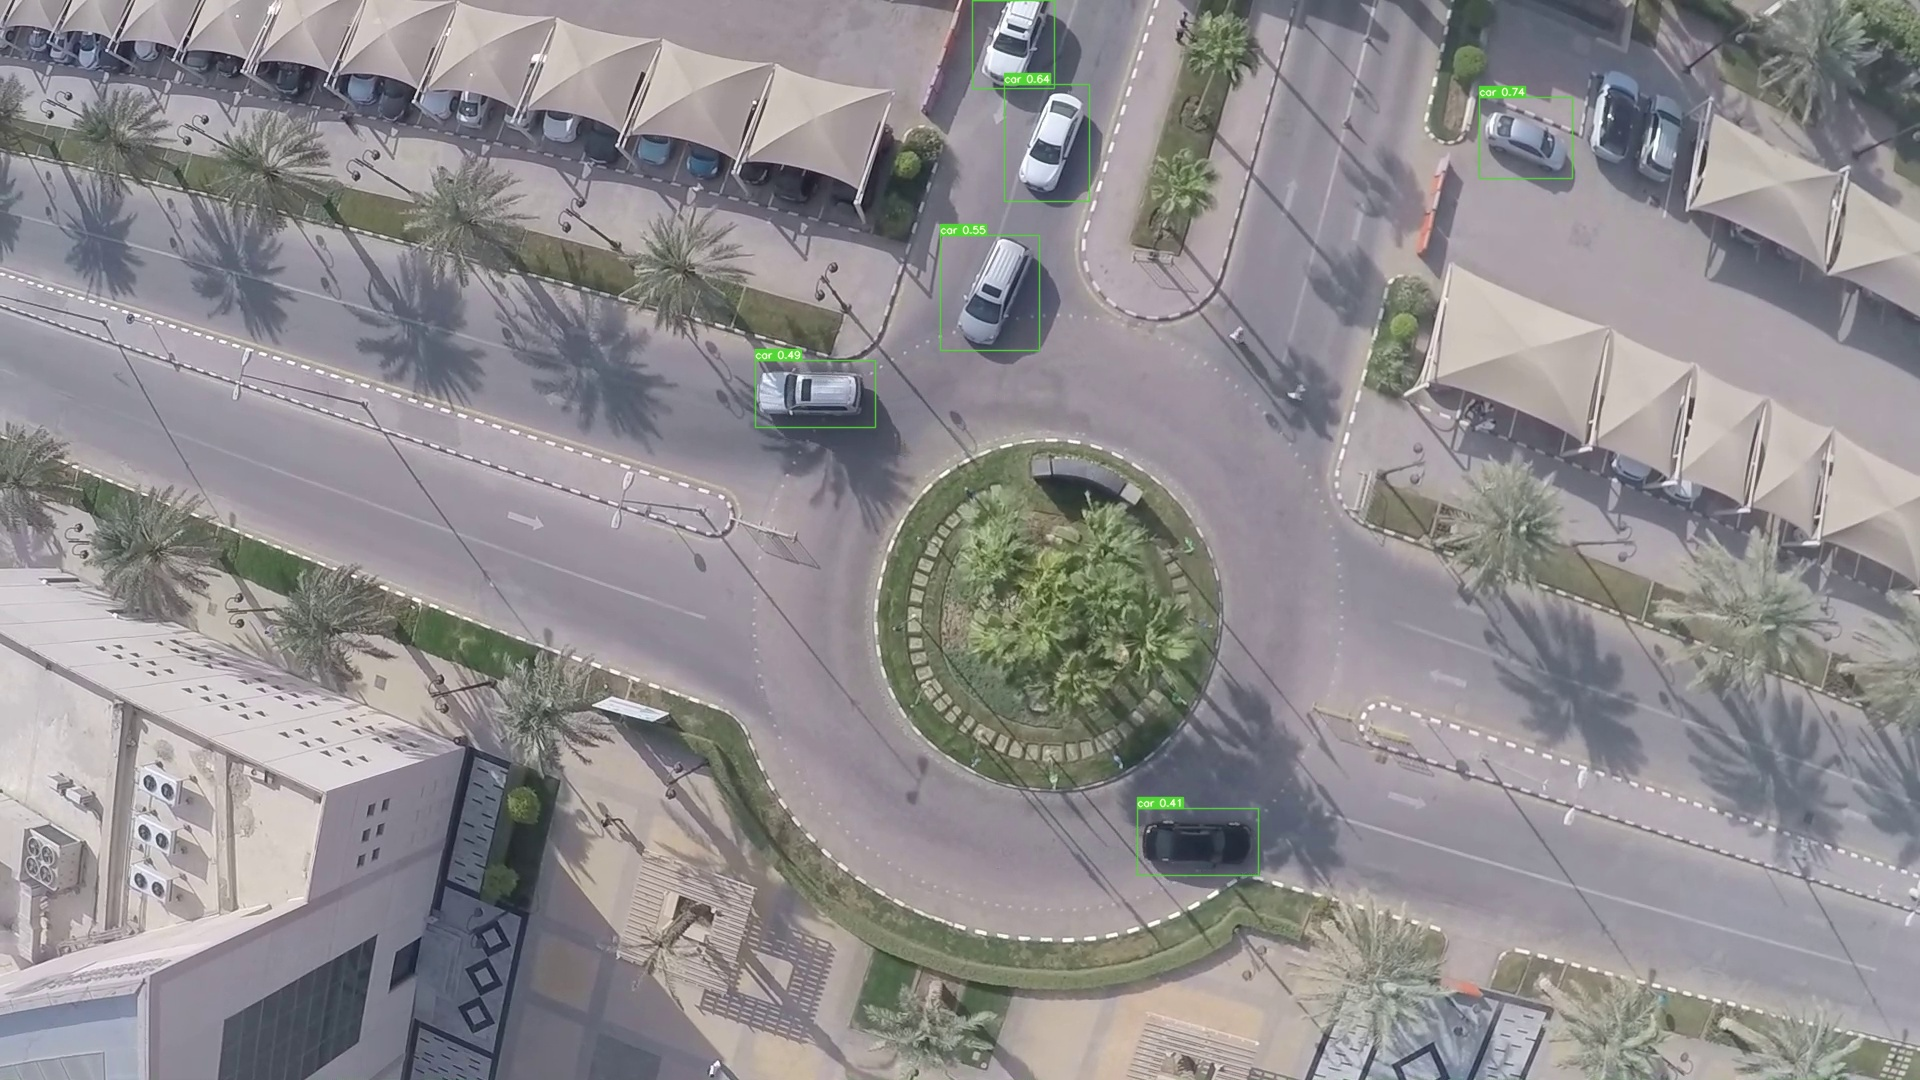

In [32]:
from IPython.display import Image, display
display(Image(filename="/content/drive/MyDrive/mipt/Nir/yolov7_train/yolov7/runs/detect/exp16/test.jpg"))

Результат получил. Но вроде это не очень хорошо. Должно использовать датасет больше